In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Data/Correct_data.csv")
df.to_csv("FinalData/no_error.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Current  10300 non-null  float64
 1   Fc       10300 non-null  float64
 2   Tc       10300 non-null  float64
 3   Tr       10300 non-null  float64
 4   Tj       10300 non-null  float64
dtypes: float64(5)
memory usage: 402.5 KB


In [ ]:
df.describe()

,Current,Fc,Tc,Tr,Tj
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,11.019731,0.438733,32.147435,62.052014,44.554936
std,3.910459,0.244404,0.396605,11.043789,6.546555
min,6.000000,0.125000,29.317715,34.946917,30.485979
25%,6.000000,0.125000,31.882817,55.743447,39.679712
50%,10.000000,0.375000,32.238376,63.856891,45.317858
75%,13.788311,0.611769,32.441552,68.892822,49.635357
max,19.972432,0.998277,35.286022,90.839534,60.022752


In [ ]:
df["Error"]=0

In [ ]:
df

,Current,Fc,Tc,Tr,Tj,Error
0,12.0,0.500,32.111391,35.444293,31.247891,0
1,12.0,0.500,32.263773,34.946917,31.552655,0
2,12.0,0.500,32.136788,35.413207,31.603449,0
3,12.0,0.500,32.416155,35.351035,31.933611,0
4,12.0,0.500,32.111391,35.413207,31.578052,0
...,...,...,...,...,...,...
10295,6.0,0.125,31.882817,59.473766,40.543212,0
10296,6.0,0.125,31.527258,59.411594,40.847977,0
10297,6.0,0.125,31.552655,59.411594,40.746389,0
10298,6.0,0.125,31.425670,59.038562,40.720992,0


# Error Geraration
## No error in data==0, Fc==1, Tc==2, Tr==3 Tj==4


In [ ]:
def Fc_error(daataframe_name, col, label,size_error_sec):
    for i in range(0, 10000, 500):
        idx = np.random.randint(i, i+300)
        if np.random.choice([True, False]):
            for j,k in zip(range(idx,idx+size_error_sec),np.linspace(0.2,0.5,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-k, label
                    if  float(daataframe_name.iloc[j,[col]])<0:
                        daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label
            for j,k in zip(range(idx+size_error_sec,idx+size_error_sec+size_error_sec),np.linspace(8,1,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-k, label
                    if  float(daataframe_name.iloc[j,[col]])<0:
                        daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label

        else:
            for j,k in zip(range(idx,idx+size_error_sec),np.linspace(0.2,0.5,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+k, label
                    if  float(daataframe_name.iloc[j,[col]])>1:
                        daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 1.2, label
            for j,k in zip(range(idx+size_error_sec,idx+size_error_sec+size_error_sec),np.linspace(8,1,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+k, label
                    if  float(daataframe_name.iloc[j,[col]])>1:
                        daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 1.2, label

    return daataframe_name

abc1 = Fc_error(df.copy(), 1, 1,100)
abc2 = Fc_error(df.copy(), 1, 1,100)
abc3 = Fc_error(df.copy(), 1, 1,100)
# abc = Fc_error(df.copy(), 1, 1,
Fc_error  = pd.concat([abc1,abc2,abc3],ignore_index=True)
# abc[abc["Error"]==1 ]
# abc[abc["Fc"]==0]


Fc_error.shape

In [ ]:
Fc_error.to_csv("FinalData/Fc_data.csv")

In [ ]:
def sinusoidal_error(daataframe_name, col, label,size_error_sec):
    # start = pd.Series([i for i in np.linspace(2,10,100)])
    # end = pd.Series([i for i in np.linspace(10,2,100)])
    for i in range(0, 10000, 500):
        idx = np.random.randint(i, i+400)
        if np.random.choice([True, False]):
            for j,k in zip(range(idx,idx+size_error_sec),np.linspace(1,8,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-k, label
            for j,k in zip(range(idx+size_error_sec,idx+size_error_sec+size_error_sec),np.linspace(8,1,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-k, label

        else:
            for j,k in zip(range(idx,idx+size_error_sec),np.linspace(1,8,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+k, label
            for j,k in zip(range(idx+size_error_sec,idx+size_error_sec+size_error_sec),np.linspace(8,1,size_error_sec)):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+k, label

    return daataframe_name

abc = sinusoidal_error(df.copy(), 3, 3,100)
abc[abc["Error"]==3]

,Current,Fc,Tc,Tr,Tj,Error
367,12.0,0.500,32.365361,36.651399,32.187582,3
368,12.0,0.500,32.568537,37.078068,32.162185,3
369,12.0,0.500,32.416155,36.789758,32.060596,3
370,12.0,0.500,32.441552,36.594707,32.035199,3
371,12.0,0.500,32.543140,36.648344,32.289170,3
...,...,...,...,...,...,...
9721,6.0,0.125,31.501861,62.310894,42.295609,3
9722,6.0,0.125,31.374876,62.146929,42.447991,3
9723,6.0,0.125,31.628847,62.293824,42.346403,3
9724,6.0,0.125,31.730435,62.502891,41.990844,3


In [ ]:
def add_0_error(daataframe_name, col, label,size_error_sec):
    '''(dataframe_,coloum_to_put_error,last_col_label,range_error to put)
'''
    # start = pd.Series([i for i in np.linspace(2,10,100)])
    # end = pd.Series([i for i in np.linspace(10,2,100)])
    for i in range(0, 10000, 500):
        idx = np.random.randint(i, i+250)
        if np.random.choice([True, False]):
            for j in range(idx,idx+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label
            for j in range(idx+size_error_sec,idx+size_error_sec+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label

        else:
            for j in range(idx,idx+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label
            for j in range(idx+size_error_sec,idx+size_error_sec+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = 0, label

    return daataframe_name

abc = add_0_error(df.copy(), 3, 3,100)


abc[abc["Error"]==3]

,Current,Fc,Tc,Tr,Tj,Error
230,12.0,0.500,32.238376,0.0,31.705038,3
231,12.0,0.500,31.908214,0.0,31.552655,3
232,12.0,0.500,32.314567,0.0,31.654244,3
233,12.0,0.500,32.263773,0.0,31.578052,3
234,12.0,0.500,32.339964,0.0,31.654244,3
...,...,...,...,...,...,...
9933,6.0,0.125,31.908214,0.0,41.330521,3
9934,6.0,0.125,31.197097,0.0,41.051153,3
9935,6.0,0.125,31.501861,0.0,41.305124,3
9936,6.0,0.125,31.552655,0.0,40.974962,3


In [ ]:

def add_5_error(daataframe_name, col, label,size_error_sec):
    '''(dataframe_,coloum_to_put_error,last_col_label,range_error to put)
'''
    # start = pd.Series([i for i in np.linspace(2,10,100)])
    # end = pd.Series([i for i in np.linspace(10,2,100)])
    for i in range(0, 10000, 500):
        idx = np.random.randint(i, i+250)
        if np.random.choice([True, False]):
            for j in range(idx,idx+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-5, label
            for j in range(idx+size_error_sec,idx+size_error_sec+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]-5, label

        else:
            for j in range(idx,idx+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+5, label
            for j in range(idx+size_error_sec,idx+size_error_sec+size_error_sec):
                    daataframe_name.iloc[j,[col]], daataframe_name.iloc[j,[5]] = daataframe_name.iloc[j,[col]]+5, label

    return daataframe_name

abc = add_5_error(df.copy(), 3, 3,100)


abc[abc["Error"]==3]

,Current,Fc,Tc,Tr,Tj,Error
190,12.0,0.500,31.882817,40.817325,31.451067,3
191,12.0,0.500,31.984405,40.817325,31.603449,3
192,12.0,0.500,32.238376,41.066013,31.603449,3
193,12.0,0.500,32.492346,41.097099,31.857420,3
194,12.0,0.500,32.339964,41.128185,31.578052,3
...,...,...,...,...,...,...
9930,6.0,0.125,31.654244,65.250916,41.432109,3
9931,6.0,0.125,31.857420,64.815712,40.695595,3
9932,6.0,0.125,31.628847,65.157658,41.101947,3
9933,6.0,0.125,31.908214,65.375260,41.330521,3


## col==> 0-Current 1-Fc	2-Tc	3-Tr	4-Tj	5-Error


## Fc Error

In [ ]:
df.copy()

,Current,Fc,Tc,Tr,Tj,Error
0,12.0,0.500,32.111391,35.444293,31.247891,0
1,12.0,0.500,32.263773,34.946917,31.552655,0
2,12.0,0.500,32.136788,35.413207,31.603449,0
3,12.0,0.500,32.416155,35.351035,31.933611,0
4,12.0,0.500,32.111391,35.413207,31.578052,0
...,...,...,...,...,...,...
10295,6.0,0.125,31.882817,59.473766,40.543212,0
10296,6.0,0.125,31.527258,59.411594,40.847977,0
10297,6.0,0.125,31.552655,59.411594,40.746389,0
10298,6.0,0.125,31.425670,59.038562,40.720992,0


In [ ]:
no_error=pd.concat([df,df,df], ignore_index=True)
no_error.shape

(30900, 6)

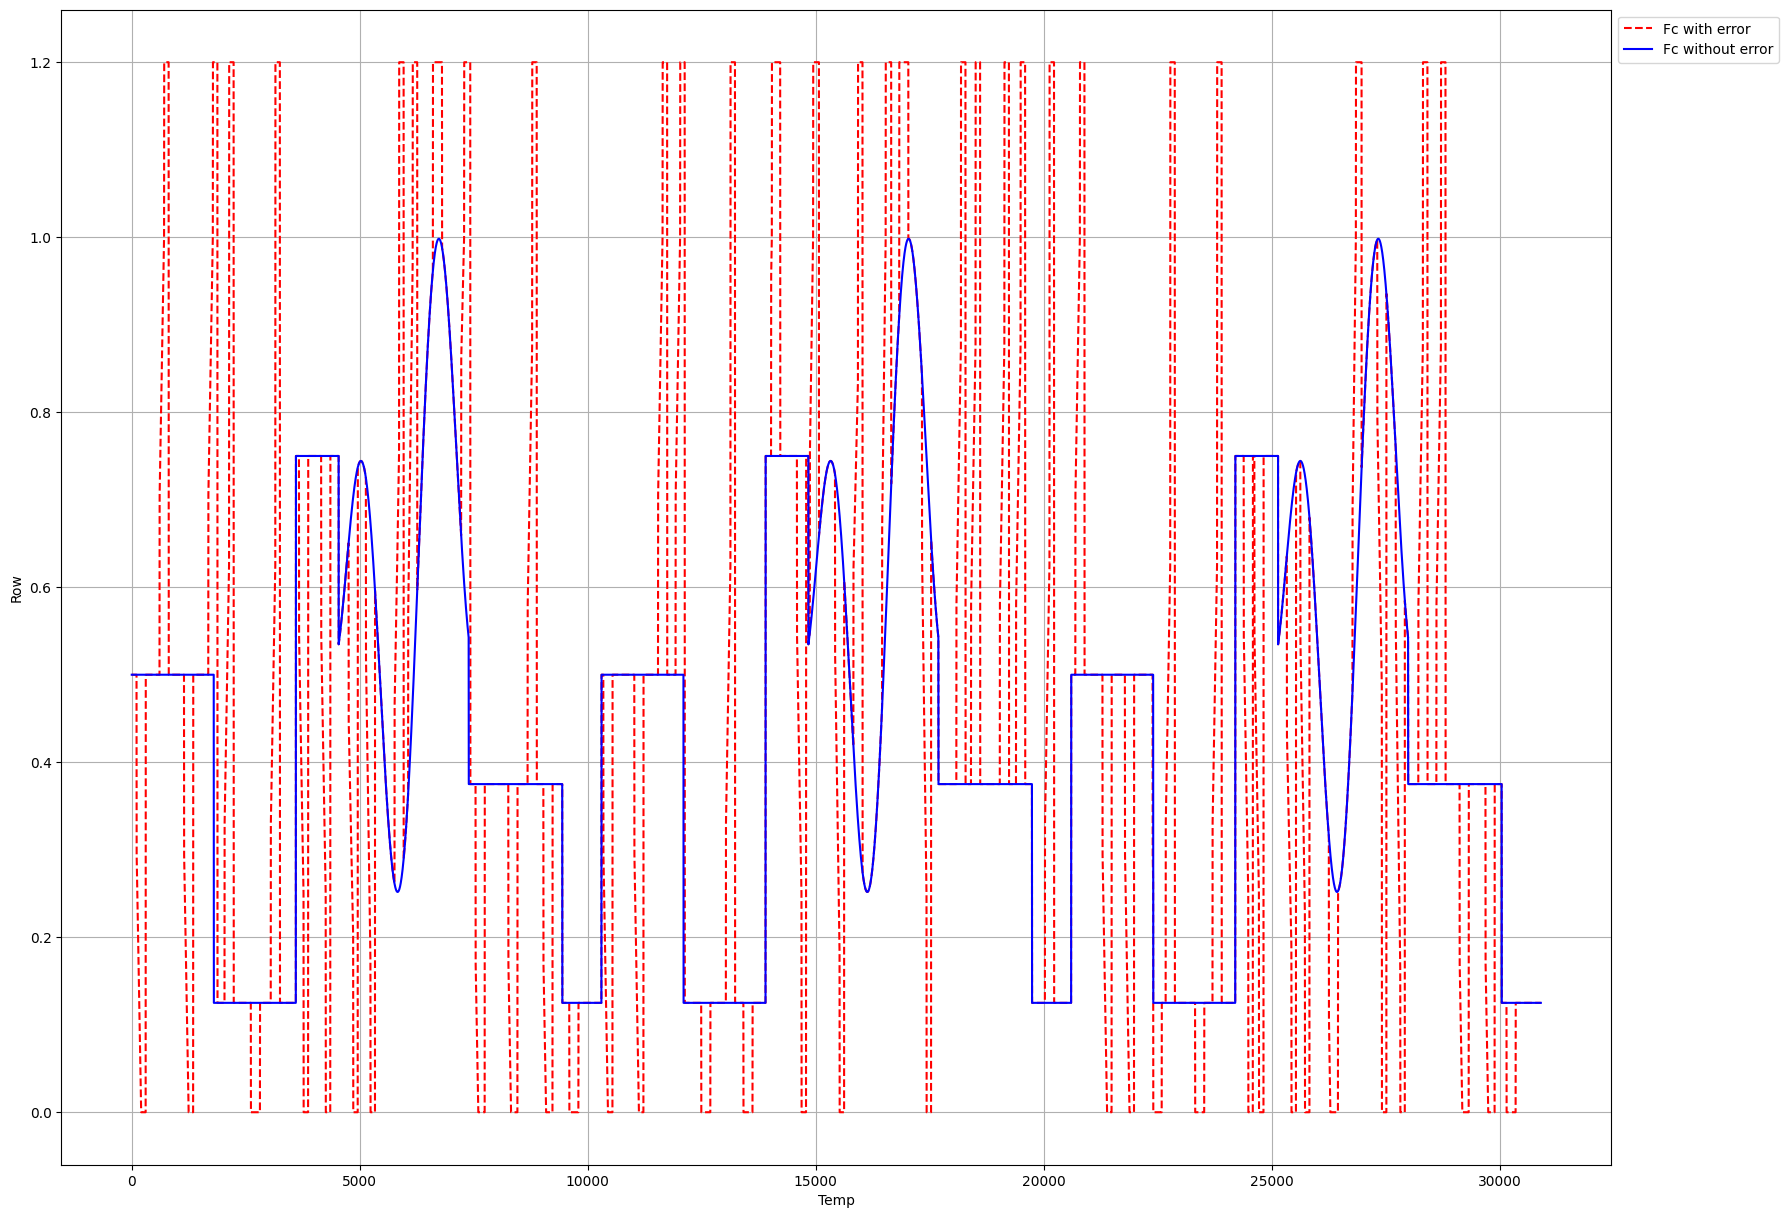

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

no_error=no_error
Fc_error=Fc_error
data1_length = len(no_error)
data2_length = len(Fc_error)

# if data2_length > data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

y2 = no_error['Fc']
y1 = Fc_error['Fc']

x = range(len(y1))
plt.figure(figsize=(20, 15))
plt.plot(x, y1, label='Fc with error', color='red', linestyle='--')

plt.plot(x, y2, label='Fc without error', color='blue', linestyle='-')


plt.xlabel('Temp')
plt.ylabel('Row')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tc Error

In [ ]:
df1=add_5_error(df.copy(), 2, 2,100)
df2=add_0_error(df.copy(), 2, 2,100)
df3=sinusoidal_error(df.copy(), 2, 2,100)

Tc_error=pd.concat([df1,df2,df3], ignore_index=True)
Tc_error.to_csv("FinalData/Tc_error.csv")


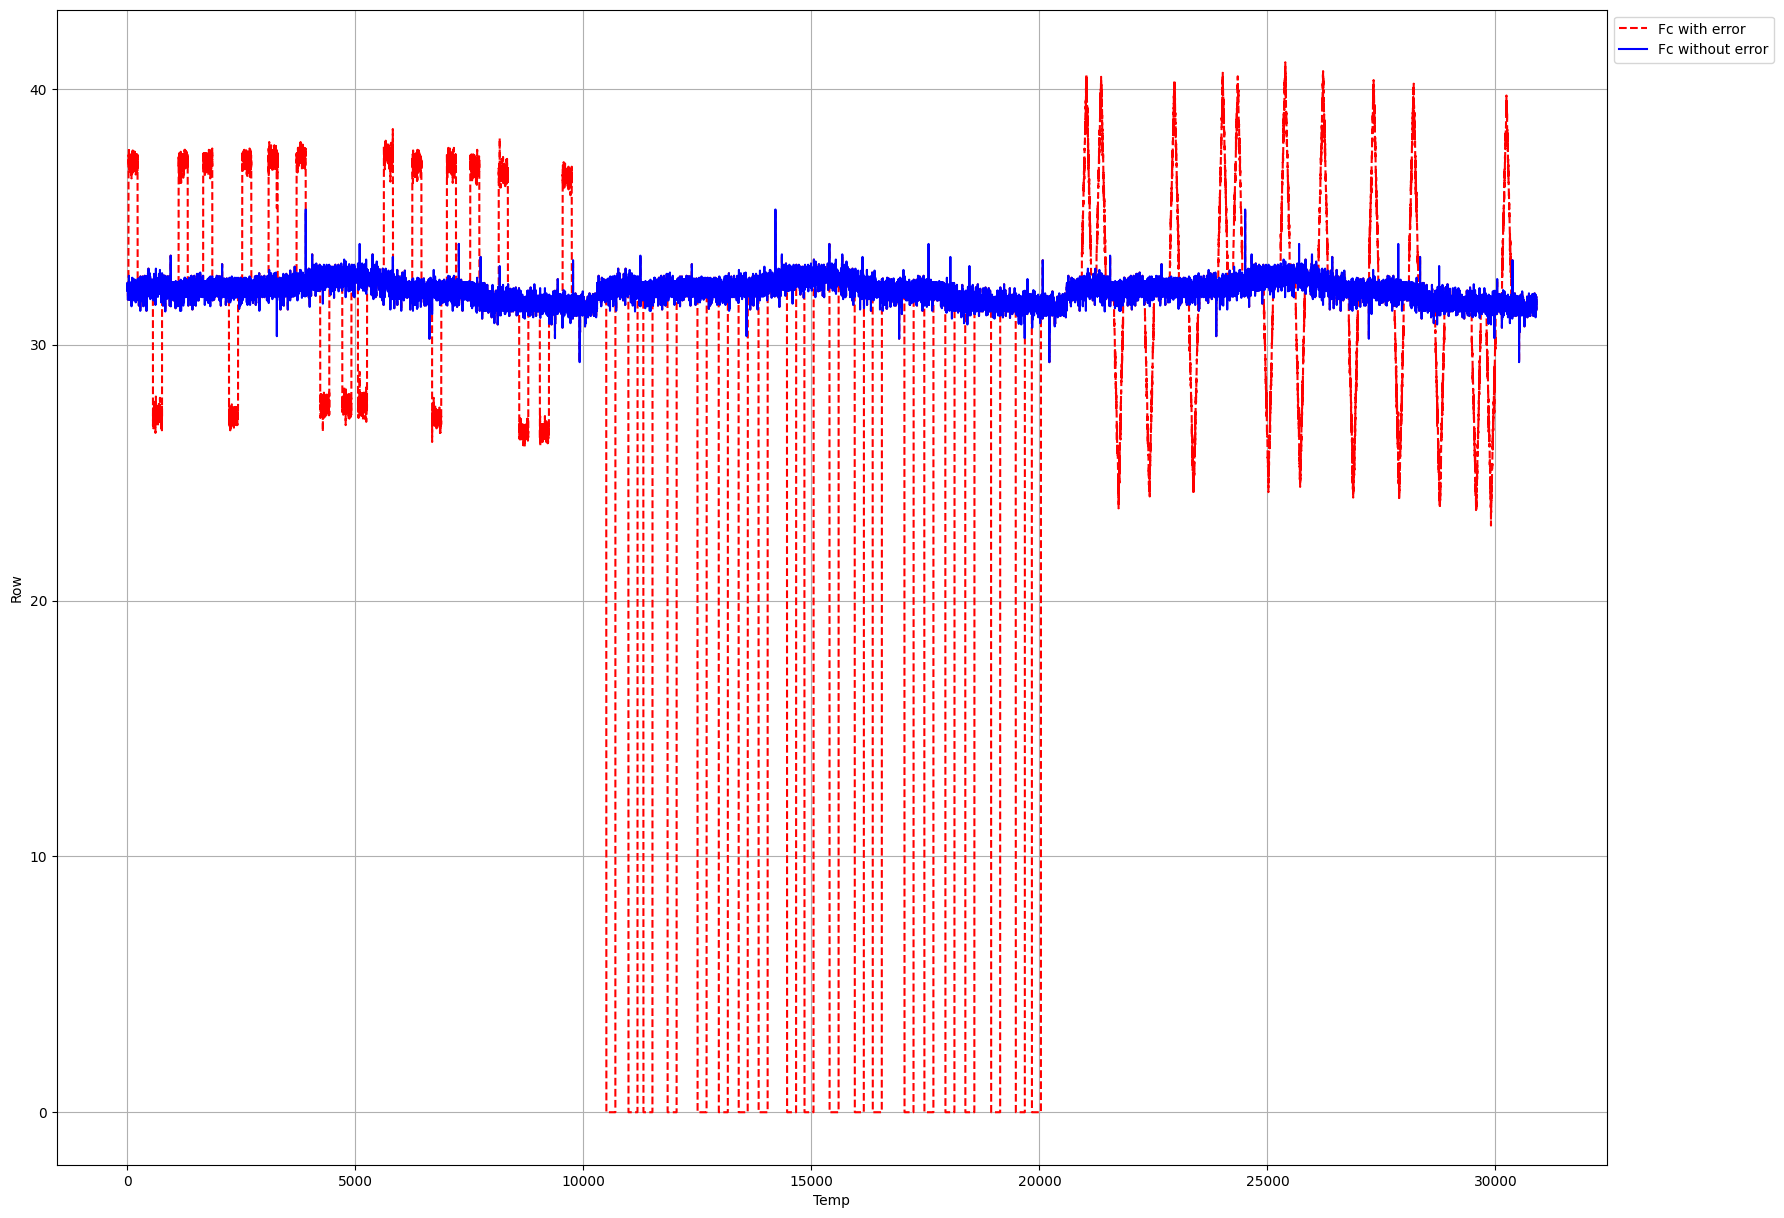

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

no_error=no_error
Fc_error=Tc_error
data1_length = len(no_error)
data2_length = len(Fc_error)

# if data2_length < data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

y2 = no_error['Tc']
y1 = Fc_error['Tc']

x = range(len(y1))
plt.figure(figsize=(20, 15))
plt.plot(x, y1, label='Fc with error', color='red', linestyle='--')

plt.plot(x, y2, label='Fc without error', color='blue', linestyle='-')


plt.xlabel('Temp')
plt.ylabel('Row')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

## Tr error

In [ ]:
df1=add_5_error(df.copy(), 3, 3,100)
df2=add_0_error(df.copy(), 3, 3,100)
df3=sinusoidal_error(df.copy(), 3, 3,100)

Tr_error=pd.concat([df3,df2,df1], ignore_index=True)
Tr_error.to_csv("FinalData/Tr_error.csv")

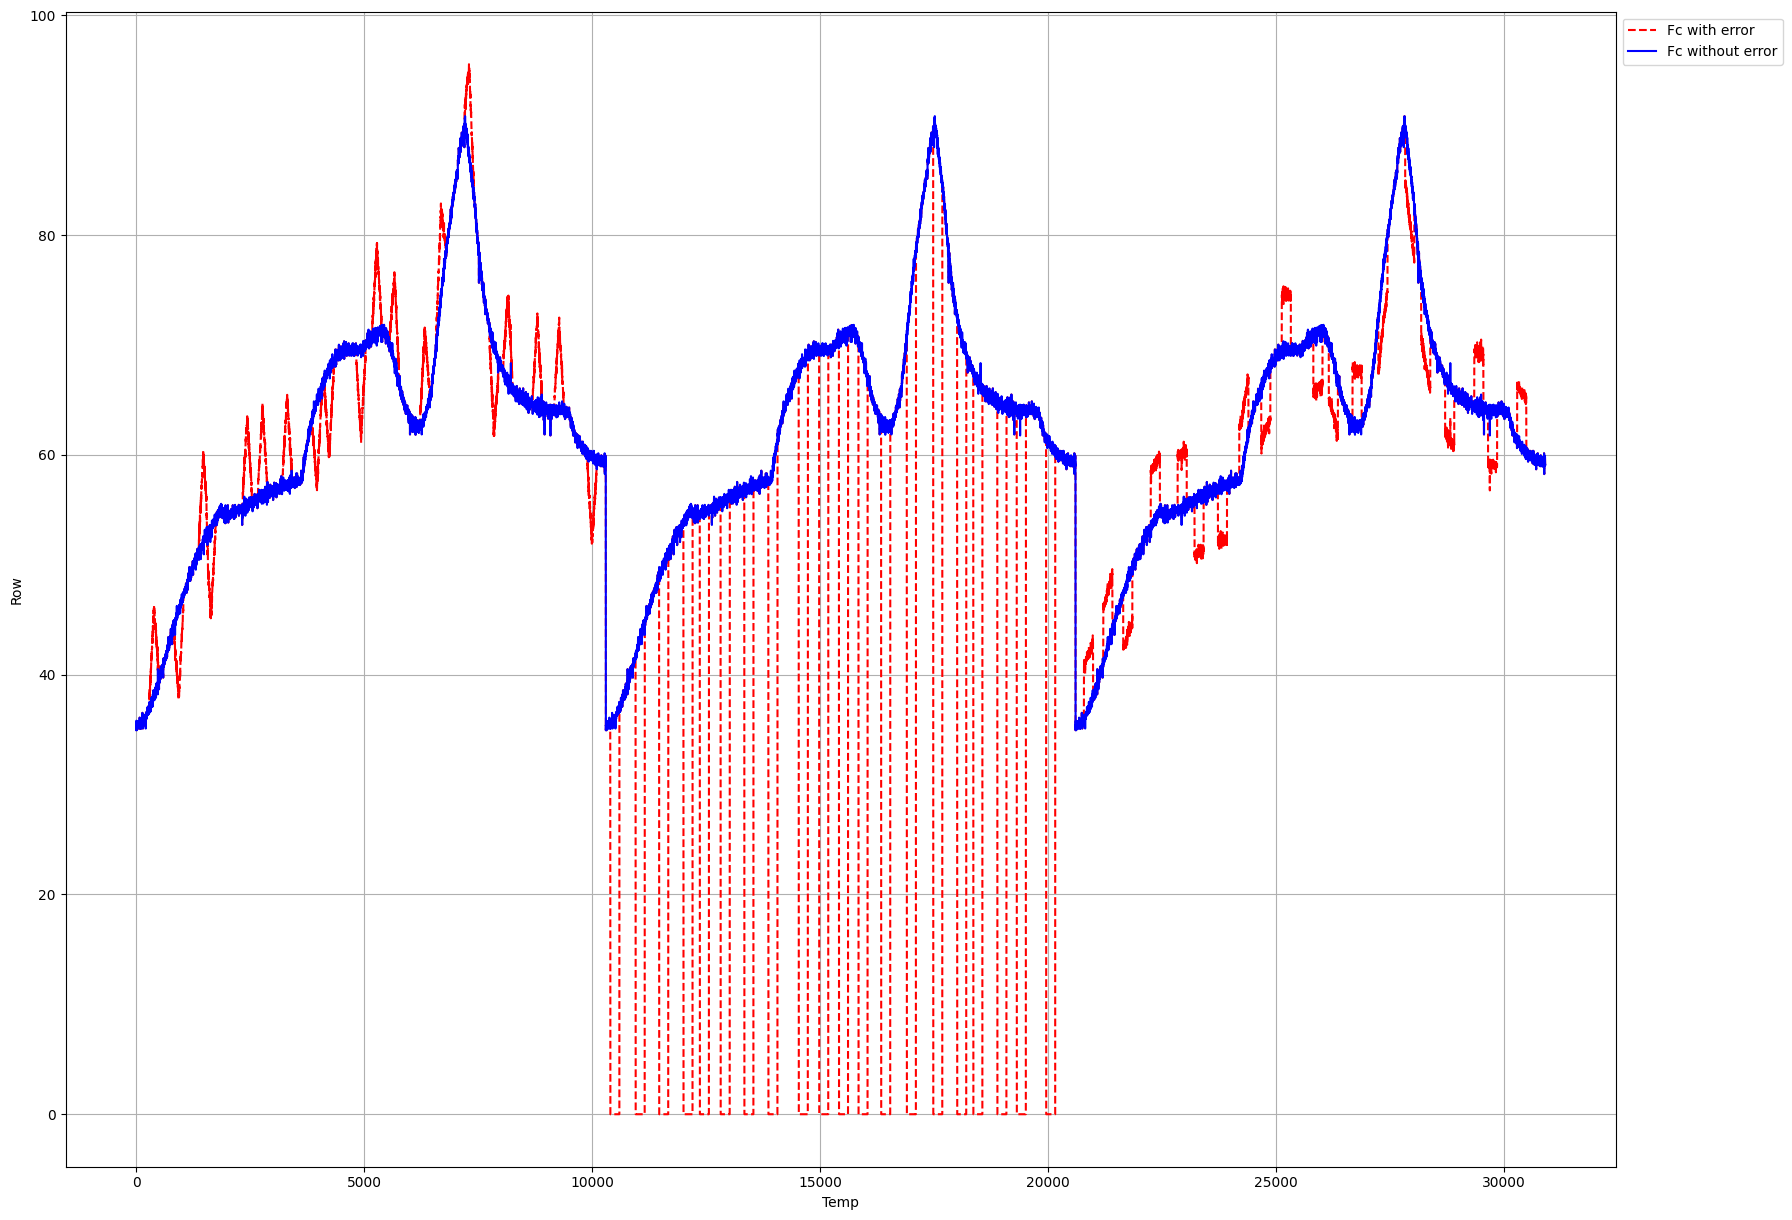

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

no_error=no_error
Fc_error=Tr_error
data1_length = len(no_error)
data2_length = len(Fc_error)

# if data2_length < data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

y2 = no_error['Tr']
y1 = Fc_error['Tr']

x = range(len(y1))
plt.figure(figsize=(10, 10))
plt.plot(x, y1, label='Fc with error', color='red', linestyle='--')

plt.plot(x, y2, label='Fc without error', color='blue', linestyle='-')


plt.xlabel('Temp')
plt.ylabel('Row')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

In [ ]:
Tr_error[Tr_error["Error"]==3]

,Current,Fc,Tc,Tr,Tj,Error
293,12.0,0.500,31.984405,38.527055,31.806626,3
294,12.0,0.500,32.263773,37.913870,31.832023,3
295,12.0,0.500,32.238376,38.171093,31.679641,3
296,12.0,0.500,32.187582,37.806596,31.552655,3
297,12.0,0.500,32.339964,38.219249,31.832023,3
...,...,...,...,...,...,...
30479,6.0,0.125,31.425670,65.095486,41.279727,3
30480,6.0,0.125,31.832023,65.375260,41.813065,3
30481,6.0,0.125,31.476464,65.499604,42.270212,3
30482,6.0,0.125,31.730435,65.375260,41.406712,3


## Tj error

In [ ]:
df1=add_5_error(df.copy(), 4, 4,100)
df2=add_0_error(df.copy(), 4, 4,100)
df3=sinusoidal_error(df.copy(), 4, 4,100)

Tj_error=pd.concat([df2,df1,df3], ignore_index=True)
Tj_error.to_csv("FinalData/Tj_error.csv")

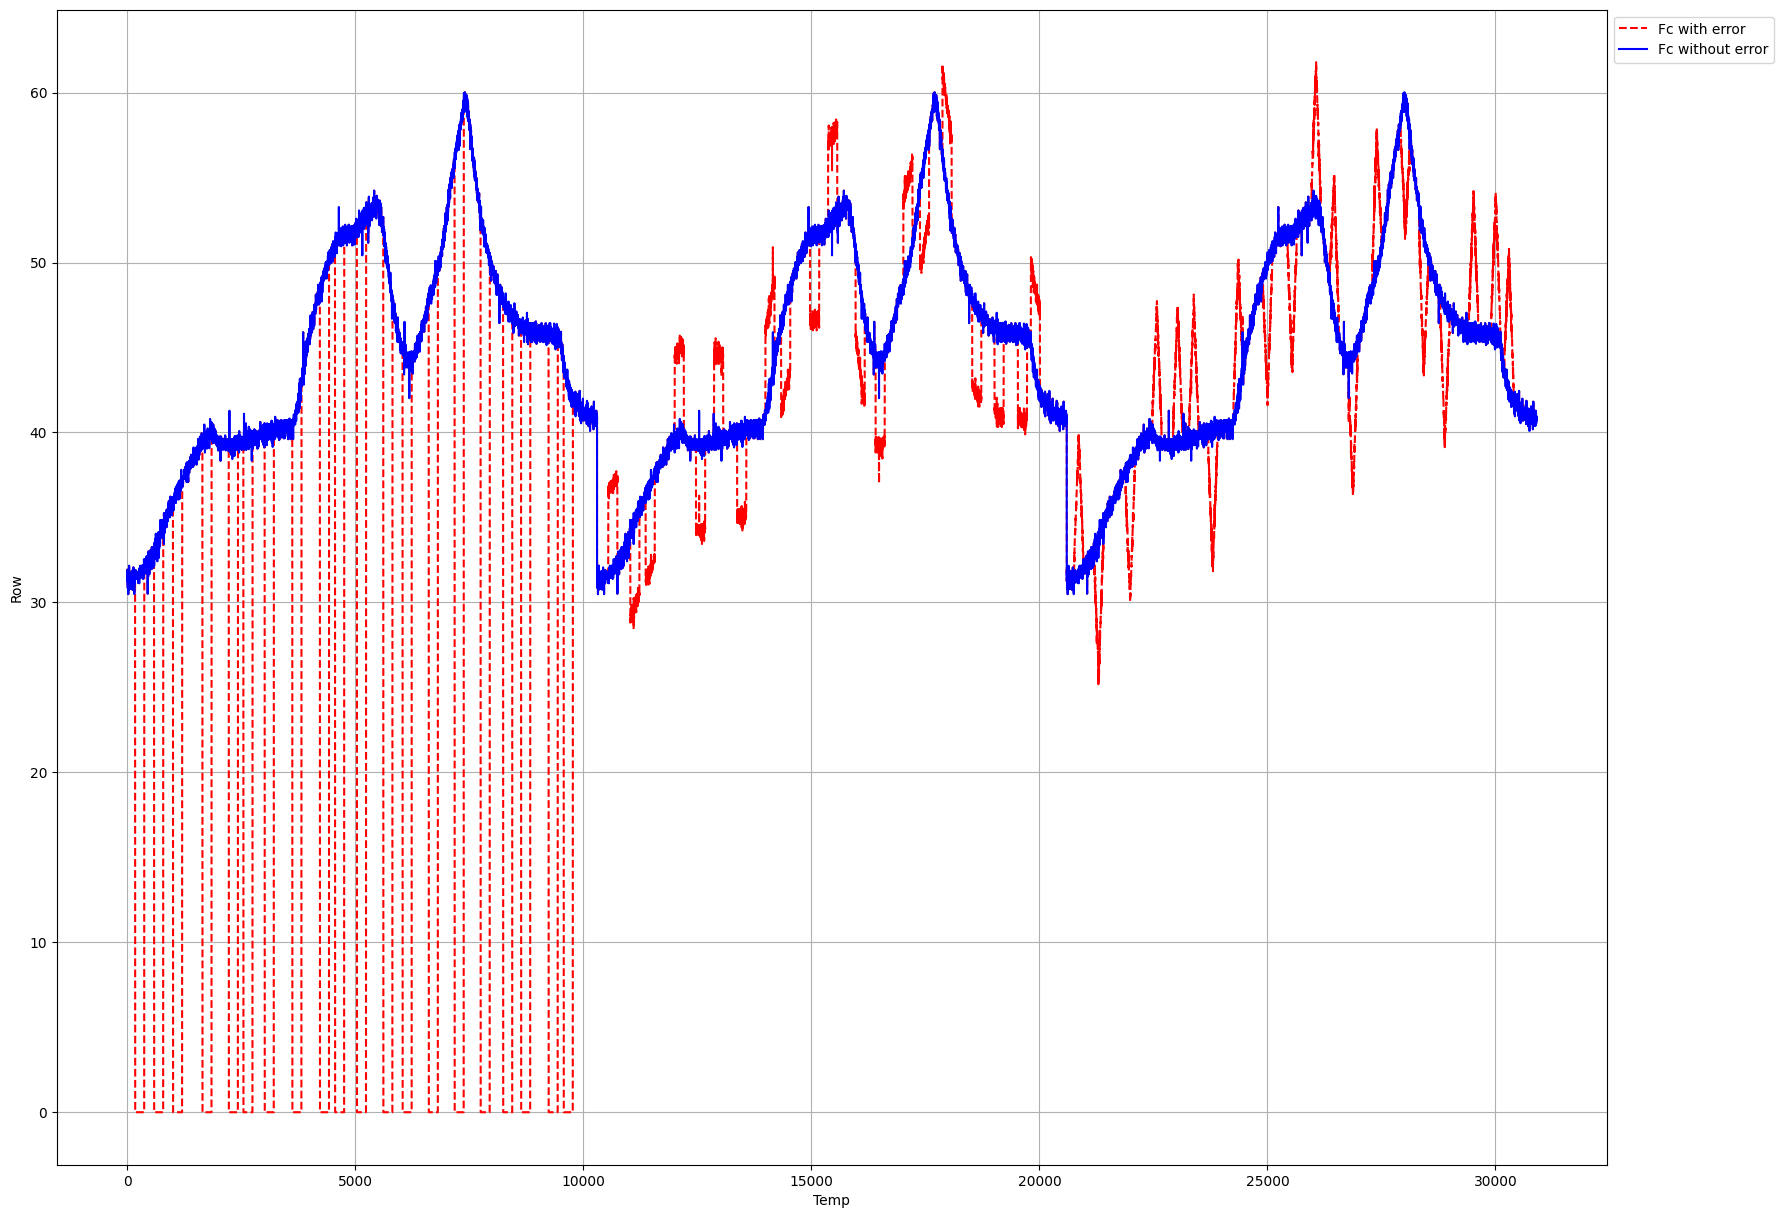

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

no_error=no_error
Fc_error=Tj_error
data1_length = len(no_error)
data2_length = len(Fc_error)

# if data2_length < data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

y2 = no_error['Tj']
y1 = Fc_error['Tj']

x = range(len(y1))
plt.figure(figsize=(20, 15))
plt.plot(x, y1, label='Fc with error', color='red', linestyle='--')

plt.plot(x, y2, label='Fc without error', color='blue', linestyle='-')


plt.xlabel('Temp')
plt.ylabel('Row')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

In [ ]:
FinalData=pd.concat([df,Fc_error,Tc_error,Tj_error,Tc_error],ignore_index=True)
FinalData.to_csv("FinalData/Final_error_data.csv")

In [ ]:
FinalData

,Current,Fc,Tc,Tr,Tj,Error
0,12.0,0.500,32.111391,35.444293,31.247891,0
1,12.0,0.500,32.263773,34.946917,31.552655,0
2,12.0,0.500,32.136788,35.413207,31.603449,0
3,12.0,0.500,32.416155,35.351035,31.933611,0
4,12.0,0.500,32.111391,35.413207,31.578052,0
...,...,...,...,...,...,...
133895,6.0,0.125,31.882817,59.473766,40.543212,0
133896,6.0,0.125,31.527258,59.411594,40.847977,0
133897,6.0,0.125,31.552655,59.411594,40.746389,0
133898,6.0,0.125,31.425670,59.038562,40.720992,0


In [ ]:
FinalData.describe()

,Current,Fc,Tc,Tr,Tj,Error
count,133900.000000,133900.000000,133900.000000,133900.000000,133900.000000,133900.000000
mean,11.019731,0.438733,30.285295,62.052014,41.864446,1.075429
std,3.910284,0.244393,7.834787,11.043295,12.393935,1.558279
min,6.000000,0.125000,0.000000,34.946917,0.000000,0.000000
25%,6.000000,0.125000,31.730435,55.743447,39.400345,0.000000
50%,10.000000,0.375000,32.212979,63.856891,44.476536,0.000000
75%,13.788311,0.611769,32.441552,68.892822,49.097621,2.000000
max,19.972432,0.998277,41.042137,90.839534,61.786045,4.000000


In [ ]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133900 entries, 0 to 133899
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Current  133900 non-null  float64
 1   Fc       133900 non-null  float64
 2   Tc       133900 non-null  float64
 3   Tr       133900 non-null  float64
 4   Tj       133900 non-null  float64
 5   Error    133900 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 6.1 MB


In [ ]:
FinalData[FinalData["Error"]==0].shape

(85900, 6)